### Begin by importing relevant packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chisquare

In [2]:
filepath = r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\gtd_clean.csv'

df = pd.read_csv(filepath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           900 non-null    int64  
 1   date              900 non-null    object 
 2   extended          900 non-null    int64  
 3   city              900 non-null    object 
 4   latitude          900 non-null    float64
 5   longitude         900 non-null    float64
 6   specificity       900 non-null    float64
 7   vicinity          900 non-null    int64  
 8   crit1             900 non-null    int64  
 9   crit2             900 non-null    int64  
 10  crit3             900 non-null    int64  
 11  success           900 non-null    int64  
 12  suicide           900 non-null    int64  
 13  attacktype1_txt   900 non-null    object 
 14  targtype1_txt     900 non-null    object 
 15  targsubtype1_txt  900 non-null    object 
 16  target1           900 non-null    object 
 1

In [4]:
names = []
for name in df.city:
        if name == 'New York':
            names.append('New York City')
        else :
            names.append(name)

df.city = names
df.city.unique()

array(['New York City', 'Seattle', 'Chicago', 'Los Angeles', 'Washington',
       'Houston', 'Miami'], dtype=object)

### A general approach begins by looking a some variables of interest. How are they distributed?

In [5]:
df_analyze = df[['city','success','suicide','attacktype1_txt','targtype1_txt','weaptype1_txt','propextent','number_related']]

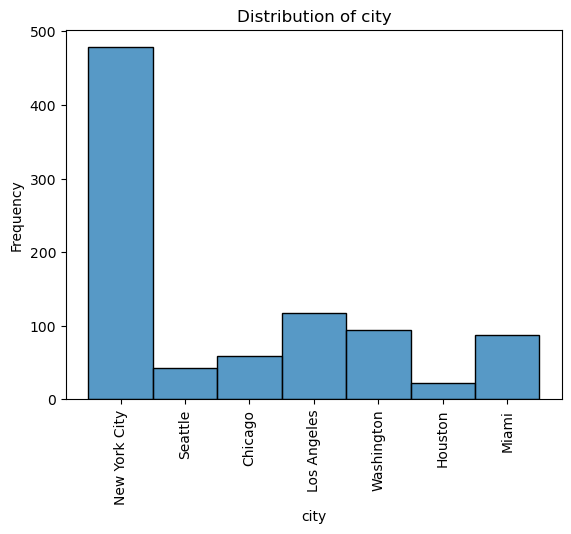

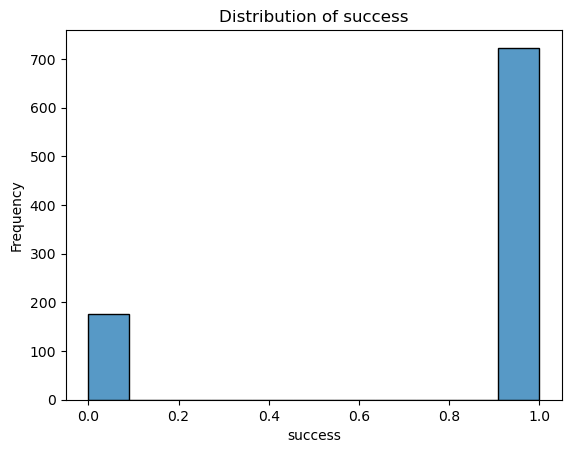

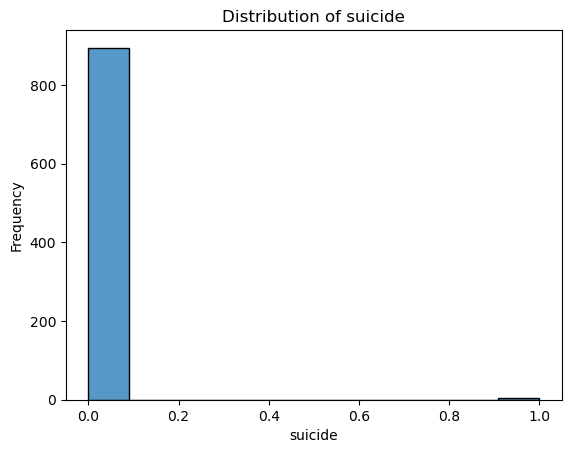

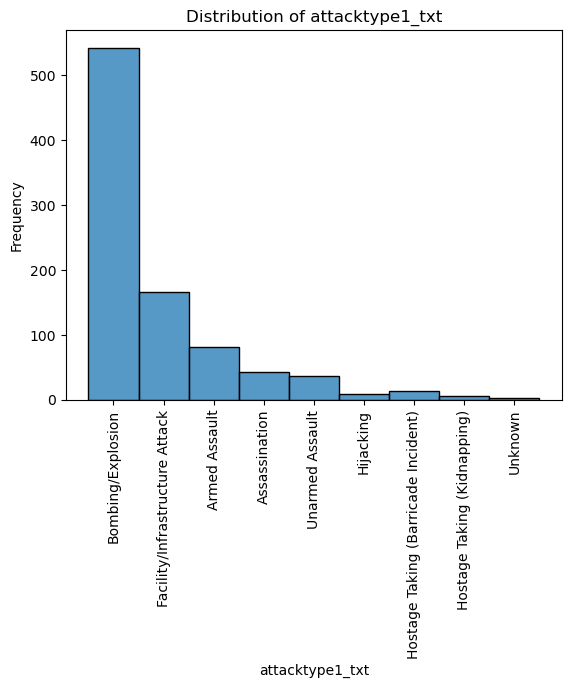

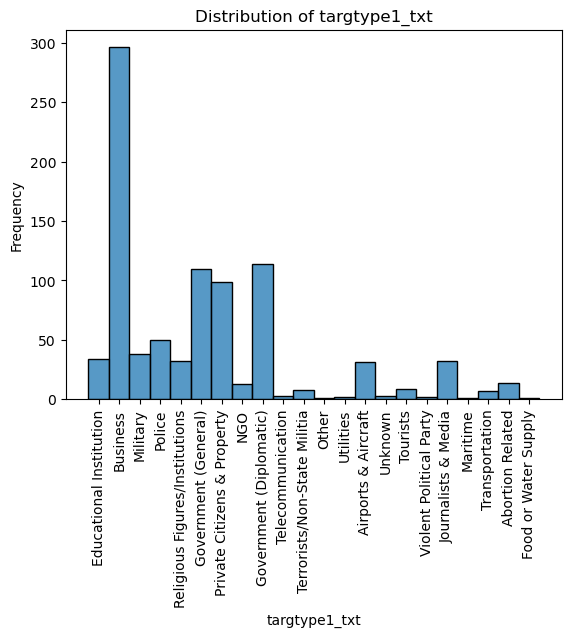

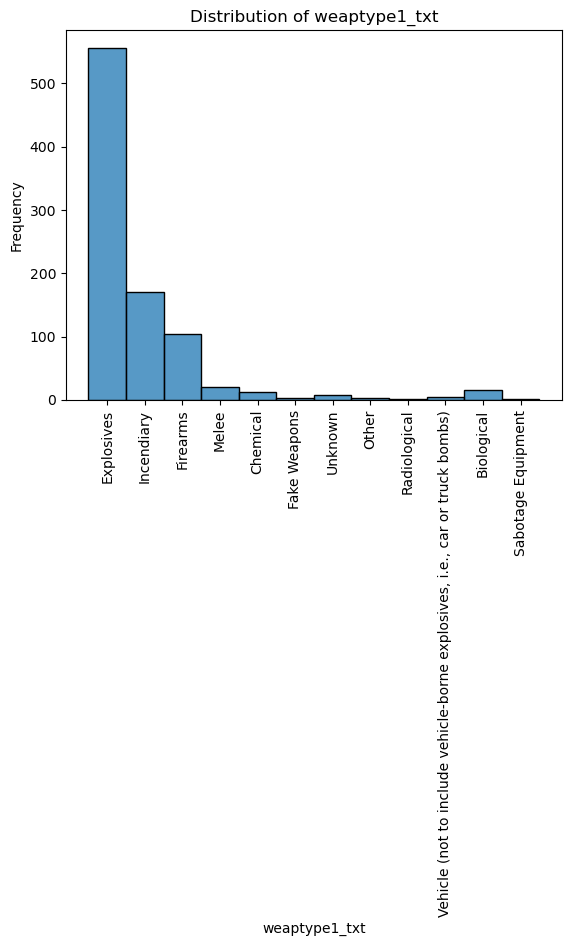

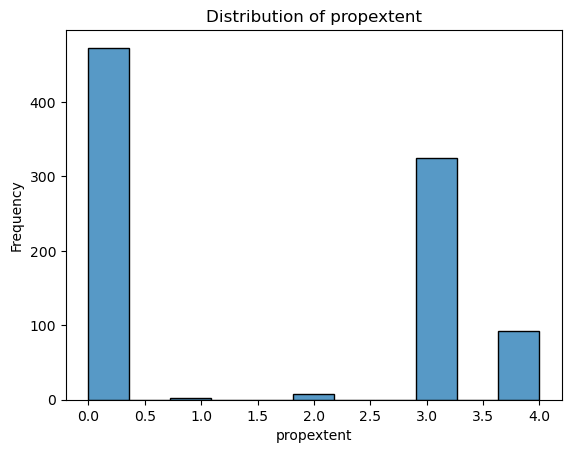

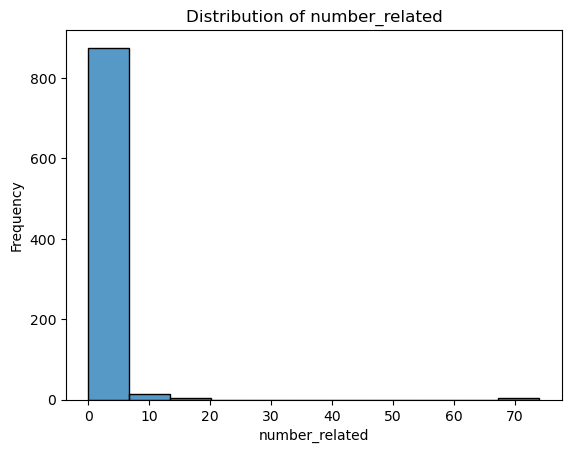

In [6]:
for feature in df_analyze :
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    if df[feature].dtype == 'object' :
        plt.xticks(rotation = 90)
    plt.show();

### Looks like most attacks are bombings and most targets are businesses. Of these cities, NYC is the most targeted and Houston the least.

### The propextent distribution tells us that the majority of attacks cause less than 1 million USD in property damage, but there are hundreds of incidents that cause more.  

### This is a good overview of these features, but I'm sure the patterns vary among specific cities. How are these features distributed in each city?

In [7]:
def cityhist(city) :
    features = list(df_analyze.columns)
    fig, ax = plt.subplots(nrows=1, ncols=(len(features) - 1), figsize = (25,7))
    print(f"Distribution of features in {city}")
    for i, feature in enumerate(features[1:]) :
        sns.histplot(x=feature, data=df[df['city'] == city], ax=ax[i])
        ax[i].set_title(feature)
        ax[i].set_xlabel(feature)
        ax[i].tick_params(axis='x', rotation=90)
        
        max_ticks = 5  
        values = df[feature].value_counts().index[:max_ticks]  
        ax[i].set_xticks(values)
        ax[i].set_xticklabels(values) 
        
    plt.tight_layout()
    #plt.subplots_adjust(wspace=5)
    plt.show();

Distribution of features in New York City


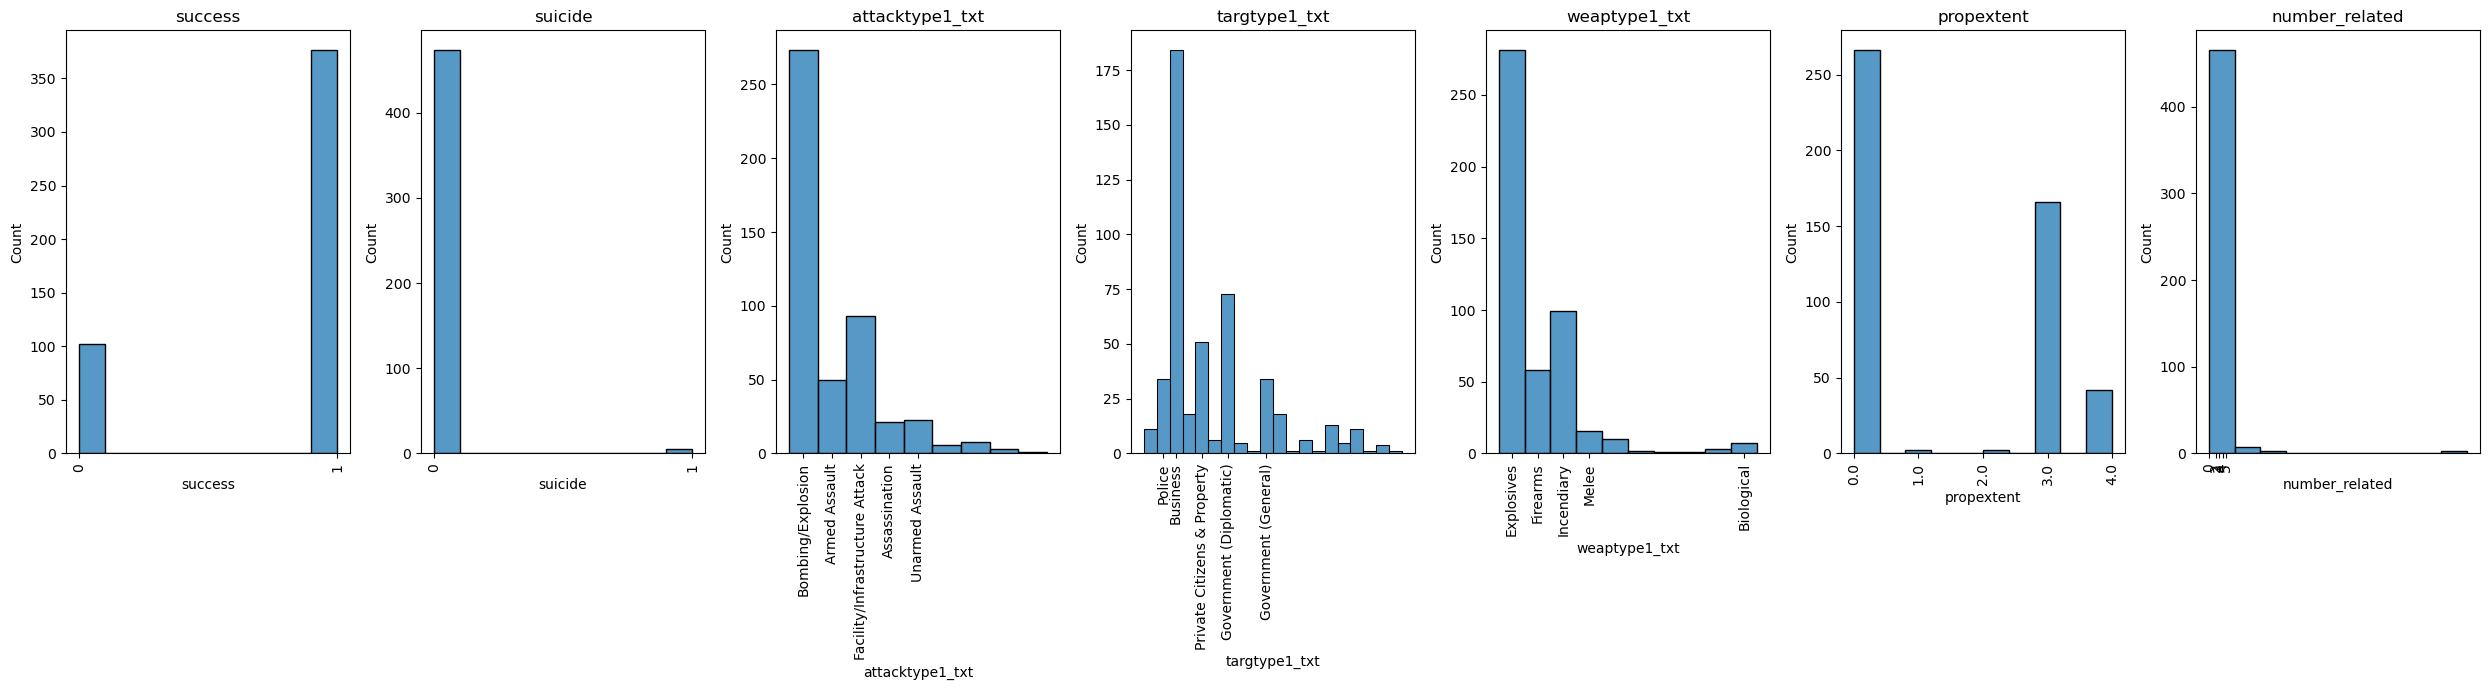

Distribution of features in Seattle


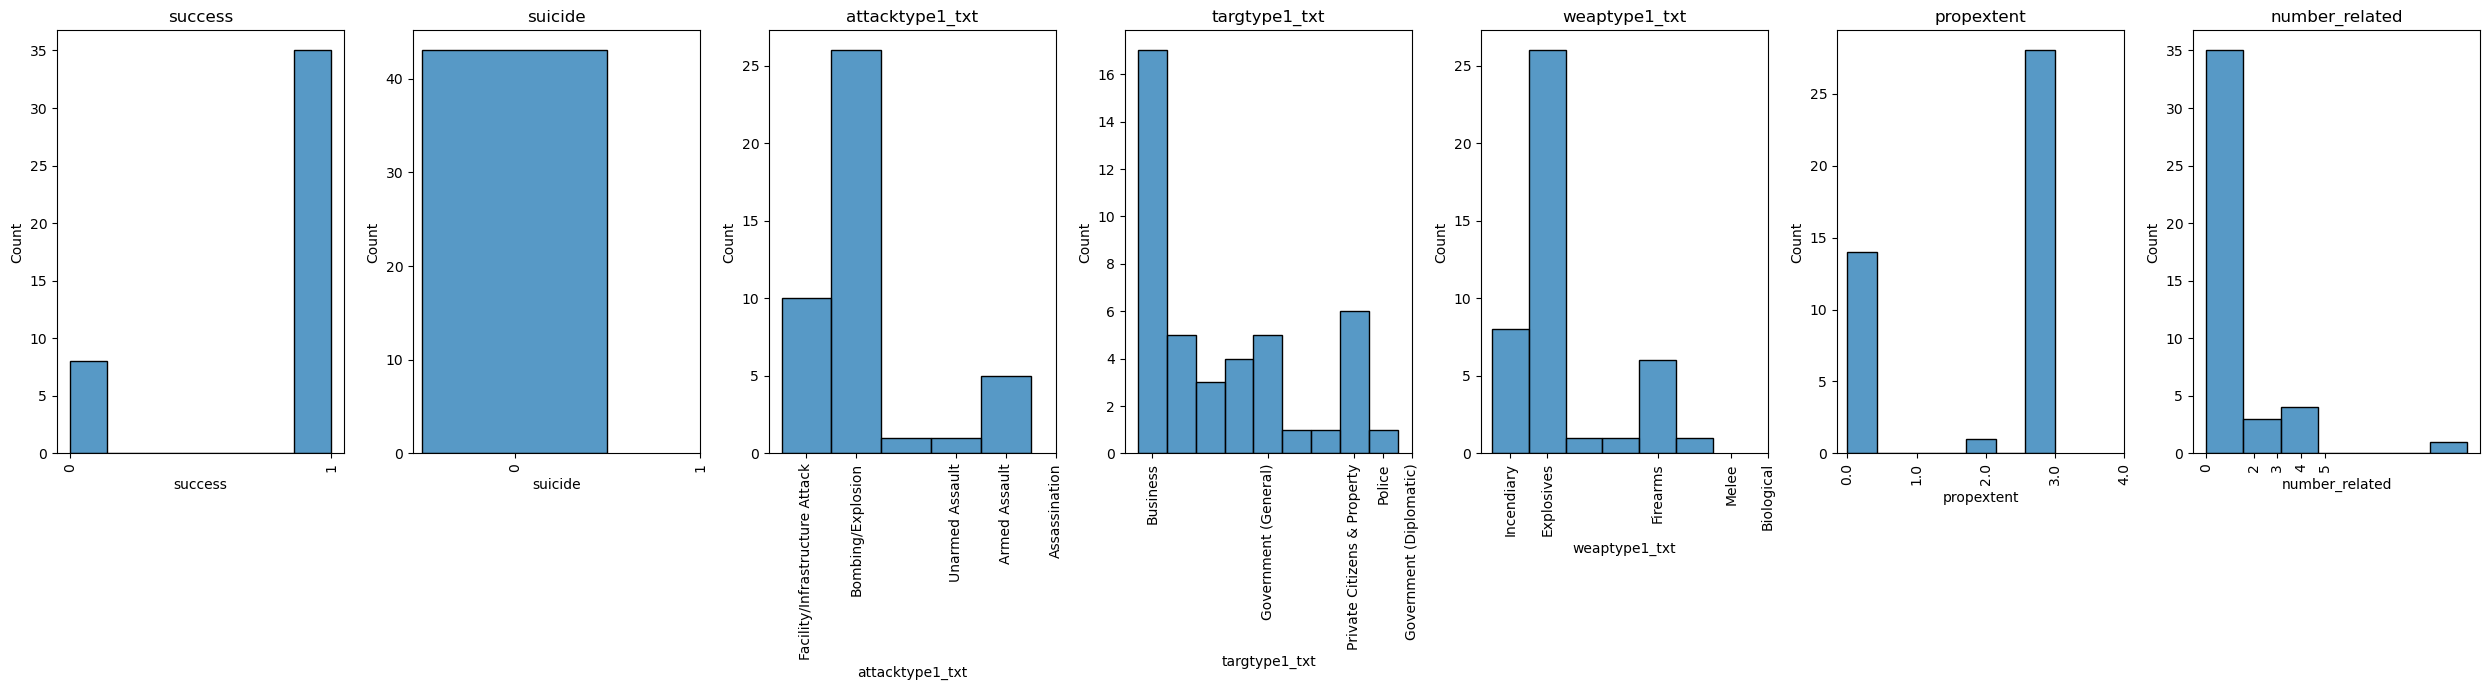

Distribution of features in Chicago


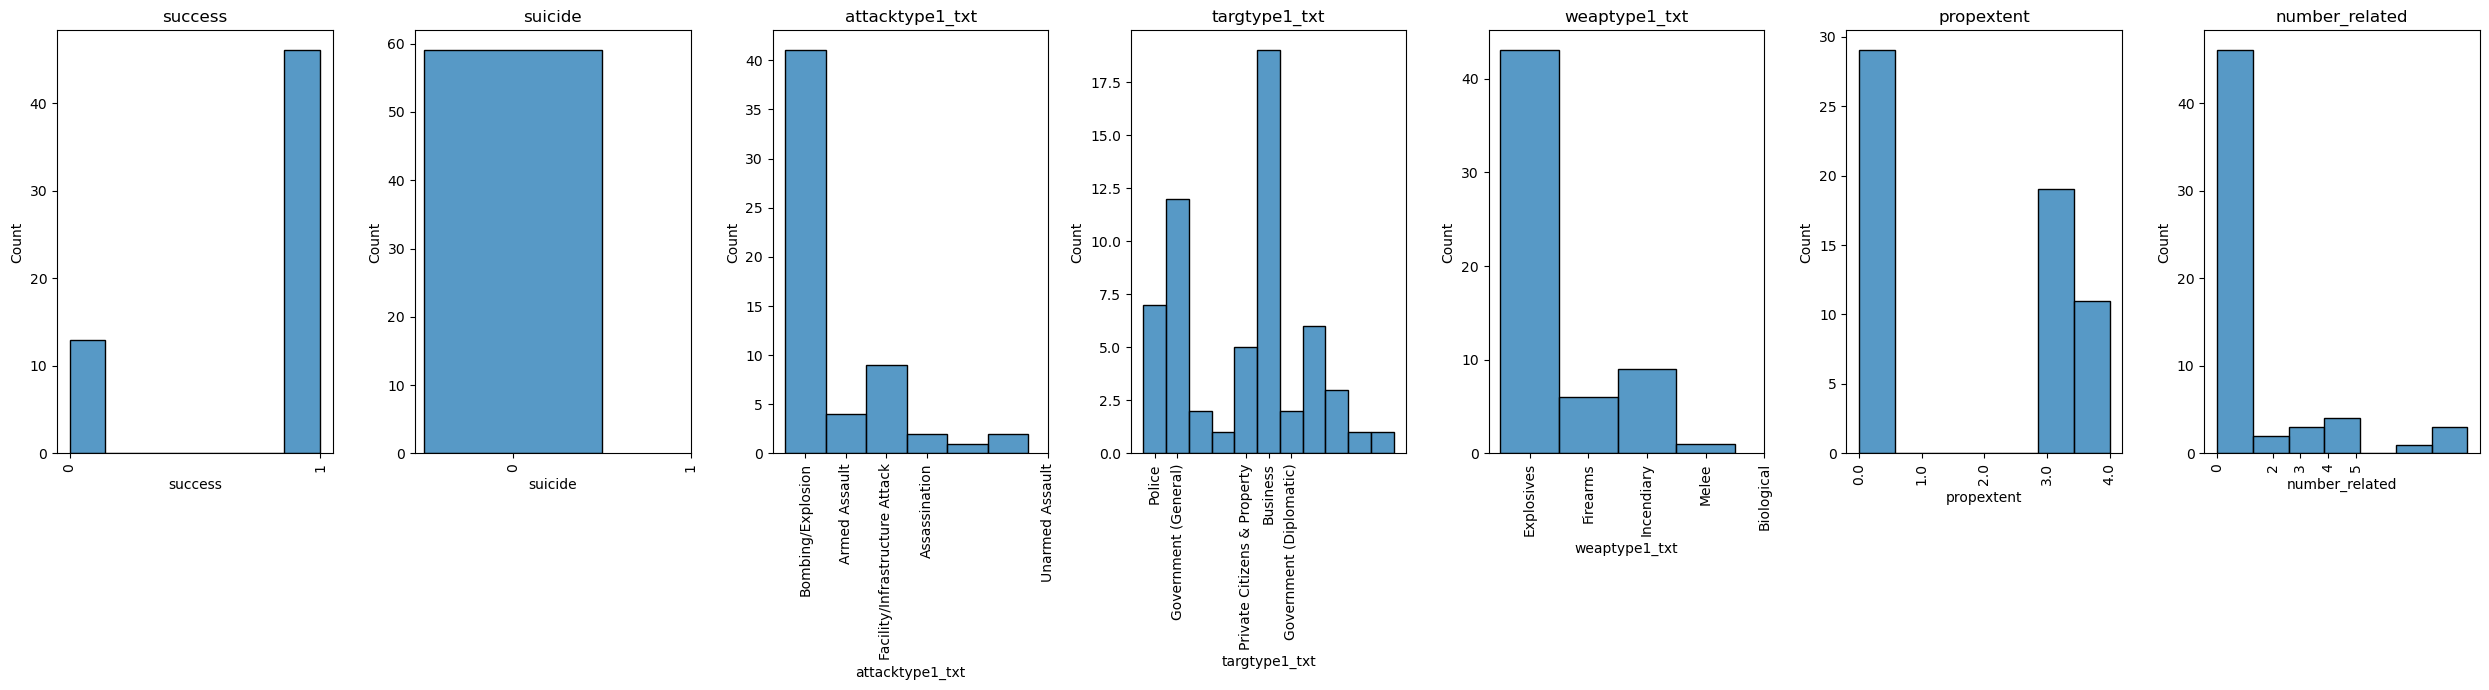

Distribution of features in Los Angeles


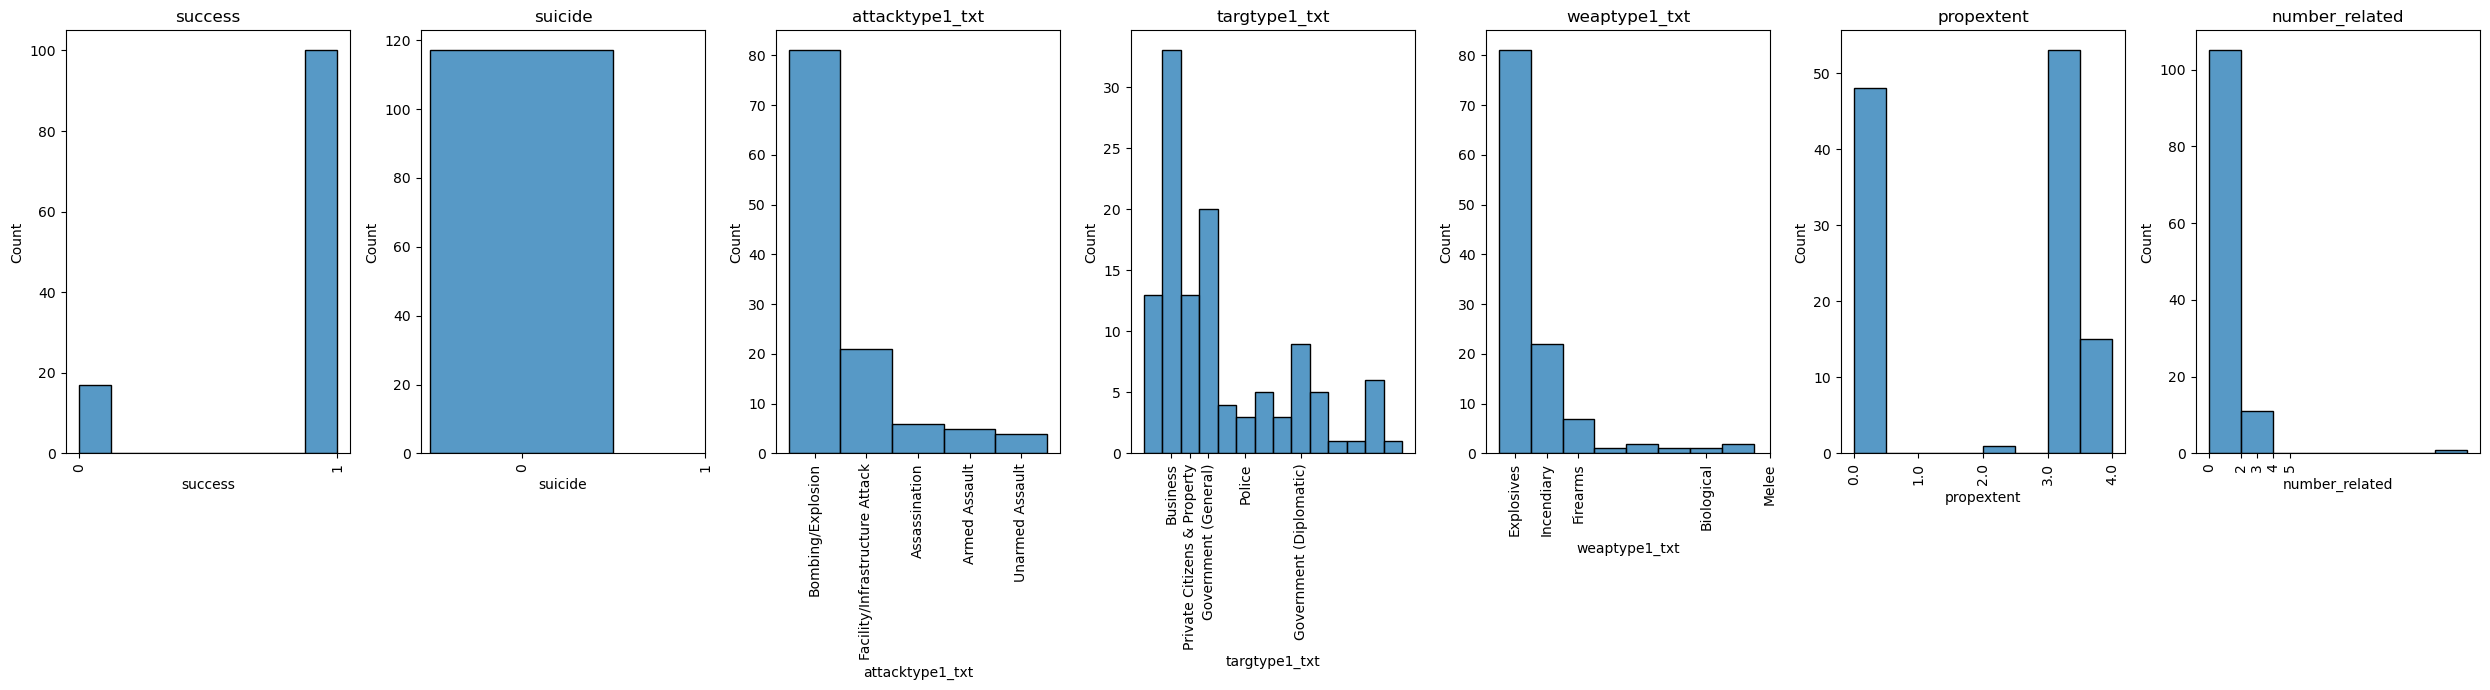

Distribution of features in Washington


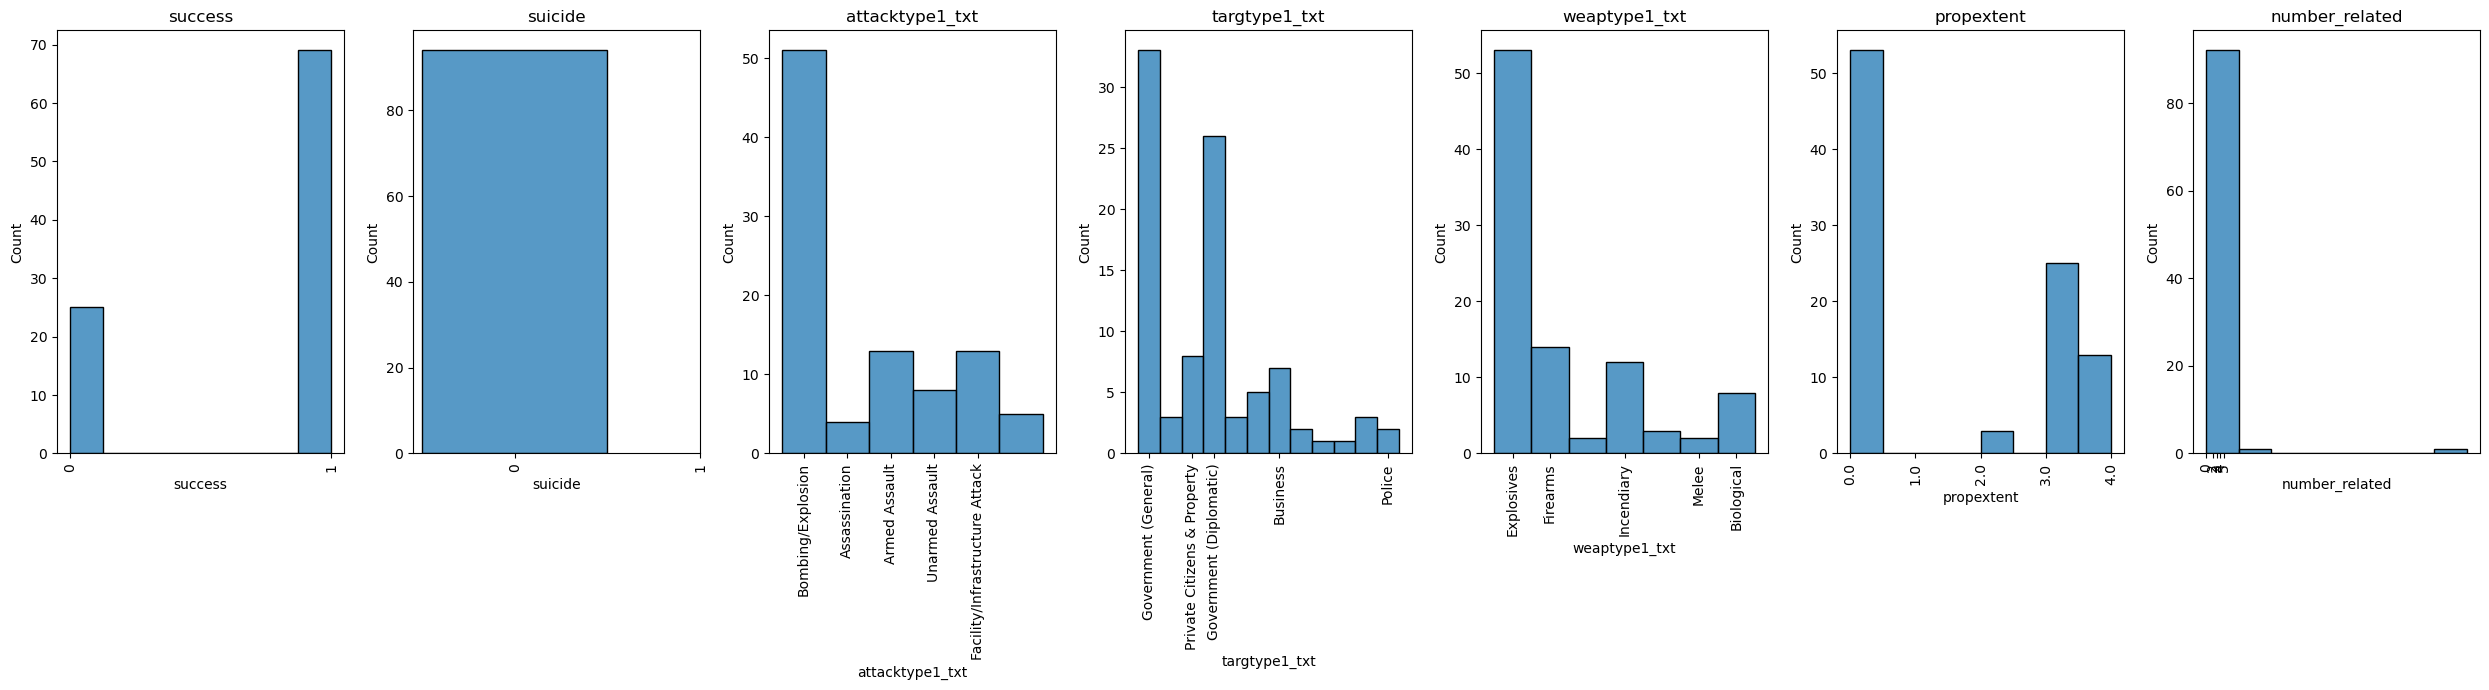

Distribution of features in Houston


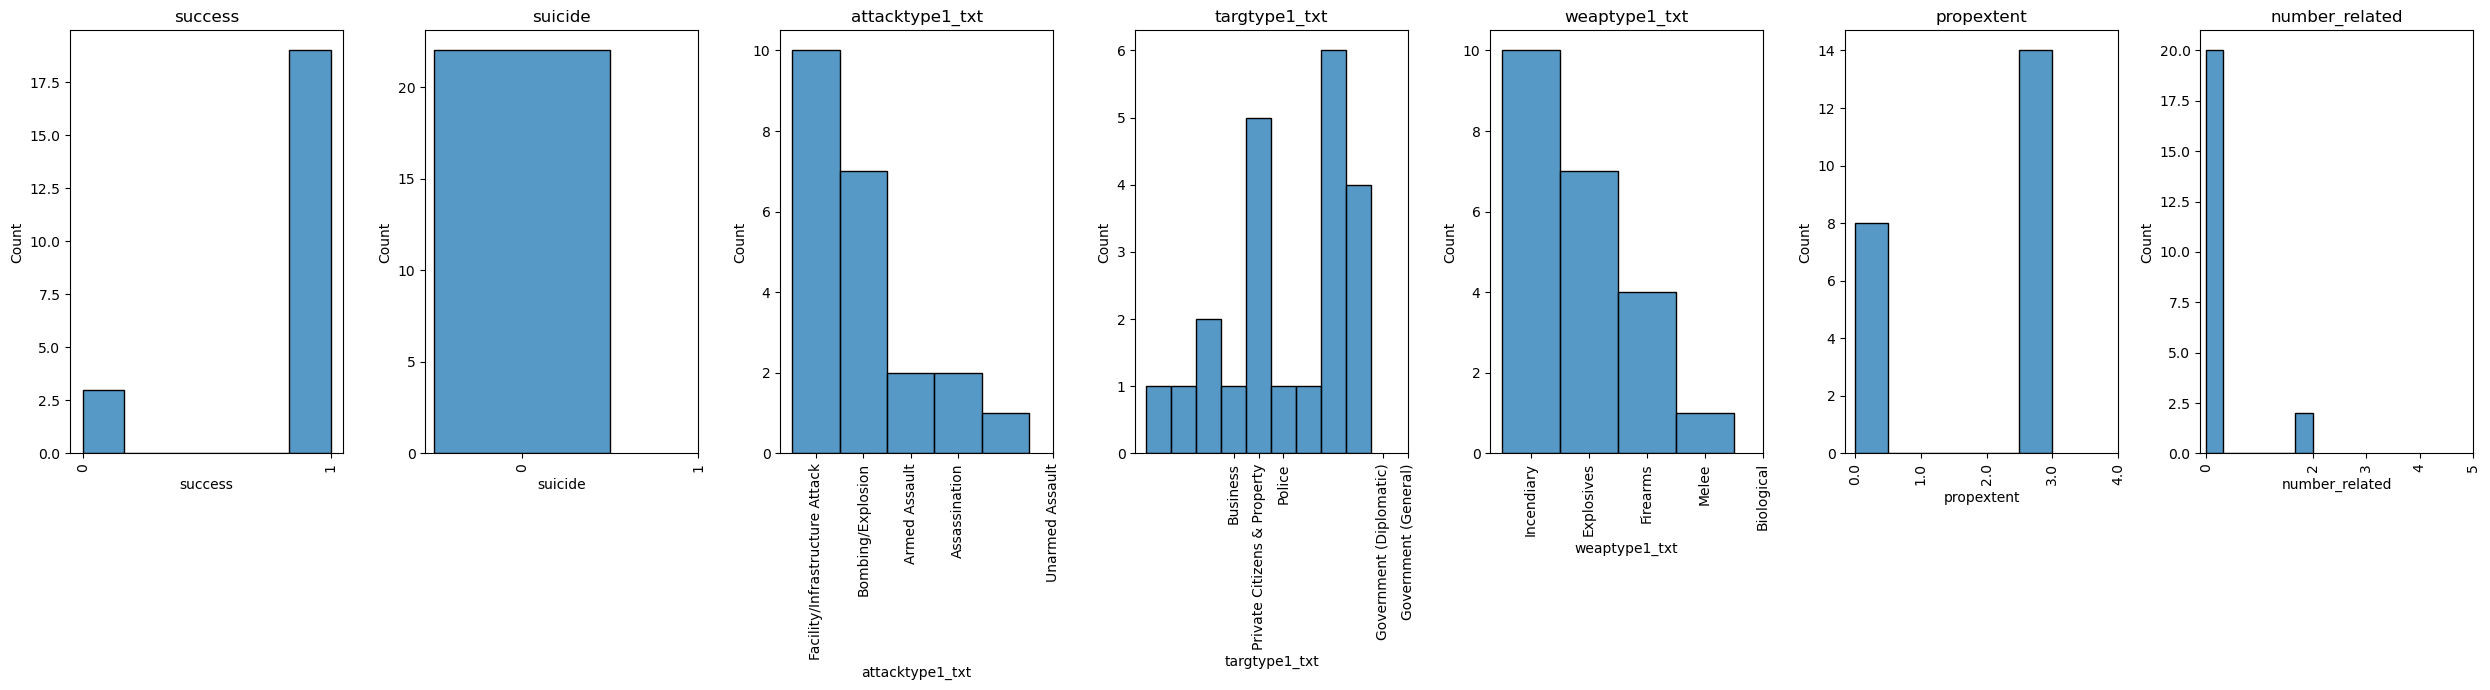

Distribution of features in Miami


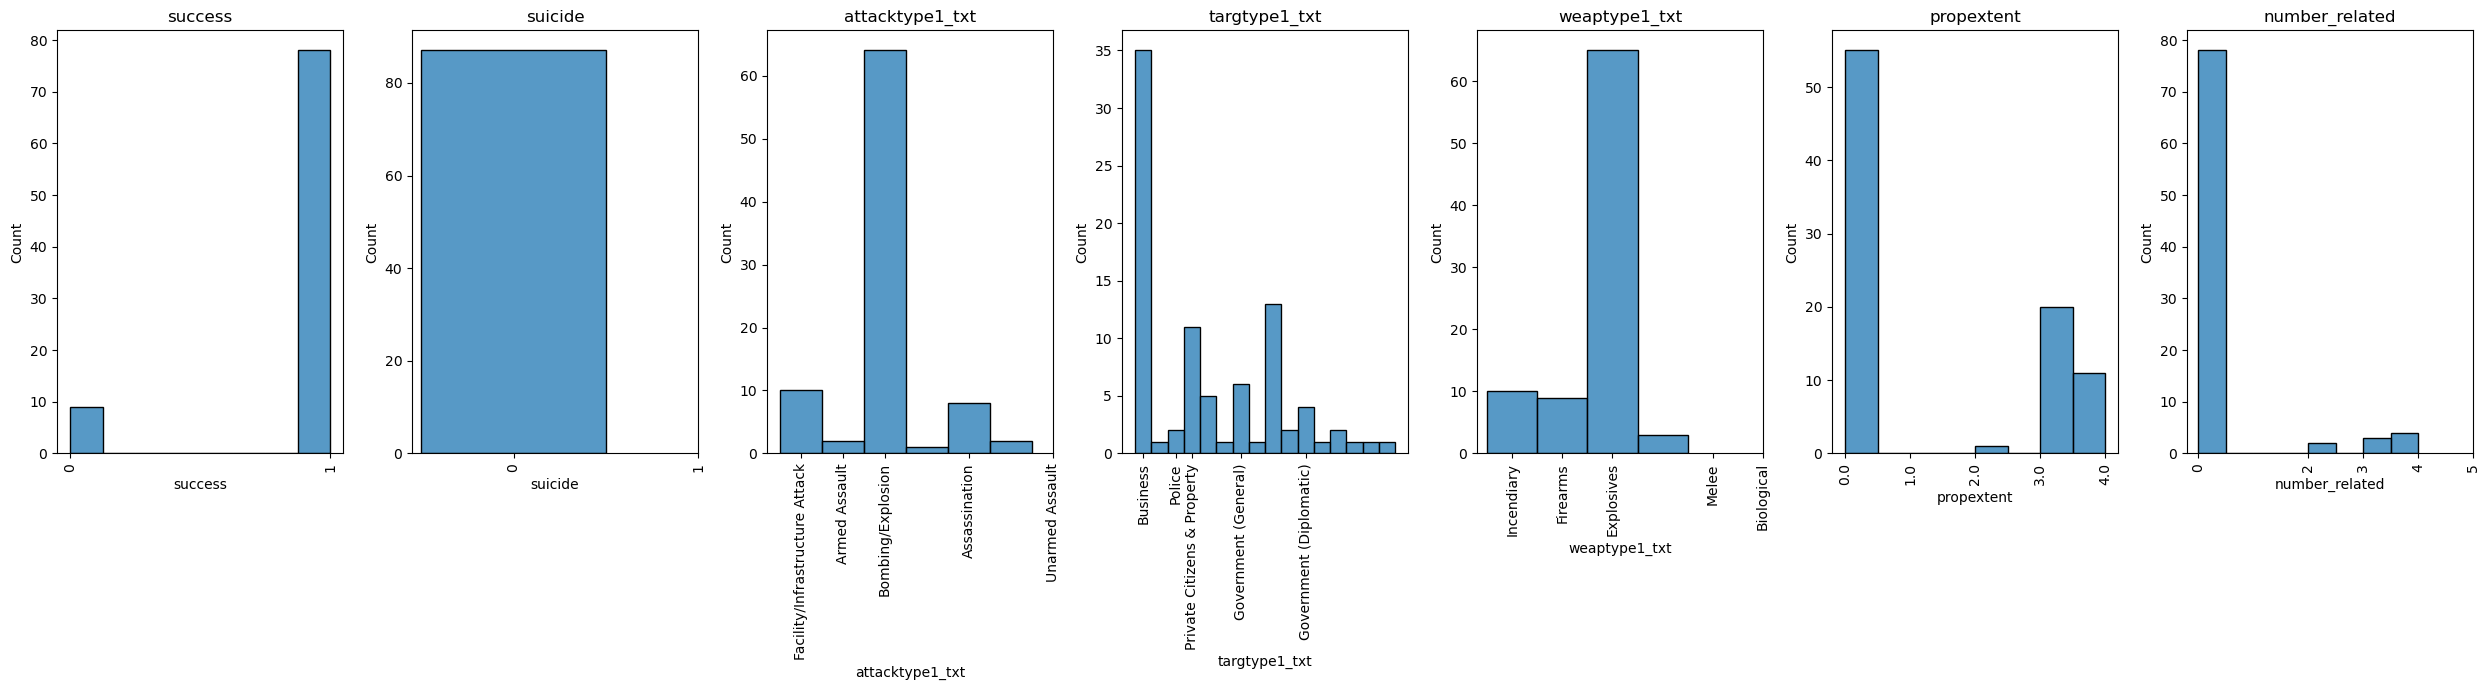

In [8]:
cities = [x for x in df.city.unique()]
for x in cities:
    cityhist(x)

### The patterns are similar to the overview, but certain cities are more prone to certain attacks. While businesses are the primary target in most cities, Houston and Washington have more government-related targets. The extent of property damage also varies between cities. 

### The variables of greatest interest as it relates to city patterns are attack type, target type, weapon type, and property extent. What is the proportion of each of these features occuring in each city? 

### After some trial and error, I've defined a function below that displays a dataframe of proportions of feature per city as well as a bar chart of relative proportions (essentially a normalized histogram). 

In [9]:
def proportionhist(feature) :
    print(f"Observed Proportions of {feature} in each city")
    probdf = pd.DataFrame()
    citylist = [x for x in df.city.unique()]
    for city in citylist:
        counts = df[df.city == city][feature].value_counts()
        ind = [i for i in counts.index]
        proportion = [x/counts.sum() for x in counts]
        myd = dict(zip(ind,proportion))
        newdf = pd.DataFrame.from_dict(myd,orient='index')
        newdf.rename(columns = {0:city}, inplace=True)
        probdf = pd.concat([probdf, newdf], axis=1)
    probdf.fillna(0, inplace=True)
    display(probdf)

    probdf_long = probdf.reset_index().melt(id_vars='index', var_name='City', value_name='Proportion')
    # Create the histogram using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=probdf_long, x='index', y='Proportion', hue='City', palette='deep')
    plt.xlabel(feature)
    plt.ylabel('Proportion per city')
    plt.title(f'Distribution of {feature} by City')
    plt.xticks(rotation=90)
    plt.legend(title='City')
    plt.show()
    

Observed Proportions of attacktype1_txt in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
Bombing/Explosion,0.571130,0.604651,0.694915,0.692308,0.542553,0.318182,0.735632
Facility/Infrastructure Attack,0.194561,0.232558,0.152542,0.179487,0.138298,0.454545,0.114943
Armed Assault,0.104603,0.116279,0.067797,0.042735,0.138298,0.090909,0.022989
Unarmed Assault,0.048117,0.023256,0.000000,0.034188,0.085106,0.000000,0.000000
Assassination,0.043933,0.000000,0.033898,0.051282,0.042553,0.090909,0.091954
Hostage Taking (Barricade Incident),0.016736,0.000000,0.016949,0.000000,0.053191,0.000000,0.000000
Hijacking,0.012552,0.023256,0.000000,0.000000,0.000000,0.000000,0.011494
Hostage Taking (Kidnapping),0.006276,0.000000,0.033898,0.000000,0.000000,0.045455,0.000000
Unknown,0.002092,0.000000,0.000000,0.000000,0.000000,0.000000,0.022989


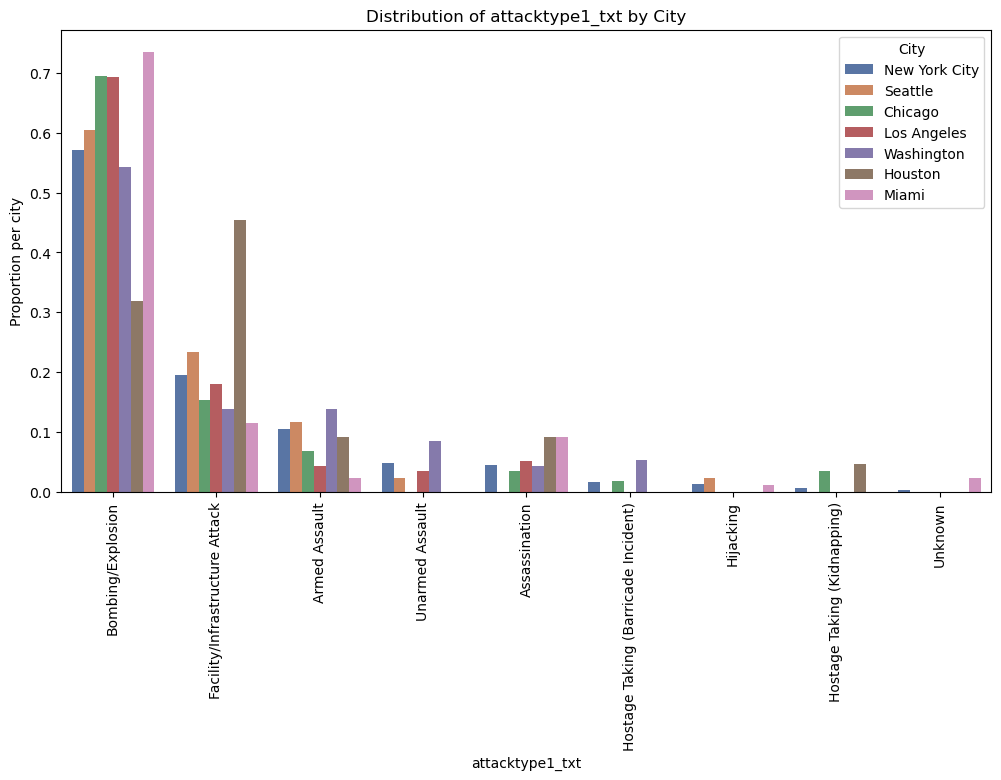

Observed Proportions of targtype1_txt in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
Business,0.384937,0.395349,0.322034,0.282051,0.074468,0.045455,0.402299
Government (Diplomatic),0.152720,0.000000,0.033898,0.076923,0.276596,0.000000,0.045977
Private Citizens & Property,0.106695,0.139535,0.084746,0.111111,0.085106,0.227273,0.126437
Government (General),0.071130,0.116279,0.203390,0.170940,0.351064,0.000000,0.068966
Police,0.071130,0.023256,0.118644,0.025641,0.021277,0.045455,0.022989
Airports & Aircraft,0.037657,0.023256,0.016949,0.042735,0.010638,0.000000,0.057471
Military,0.037657,0.069767,0.101695,0.034188,0.053191,0.045455,0.011494
Religious Figures/Institutions,0.027197,0.093023,0.016949,0.051282,0.031915,0.181818,0.011494
Journalists & Media,0.023013,0.000000,0.000000,0.042735,0.021277,0.045455,0.149425
Educational Institution,0.023013,0.116279,0.050847,0.111111,0.000000,0.045455,0.011494


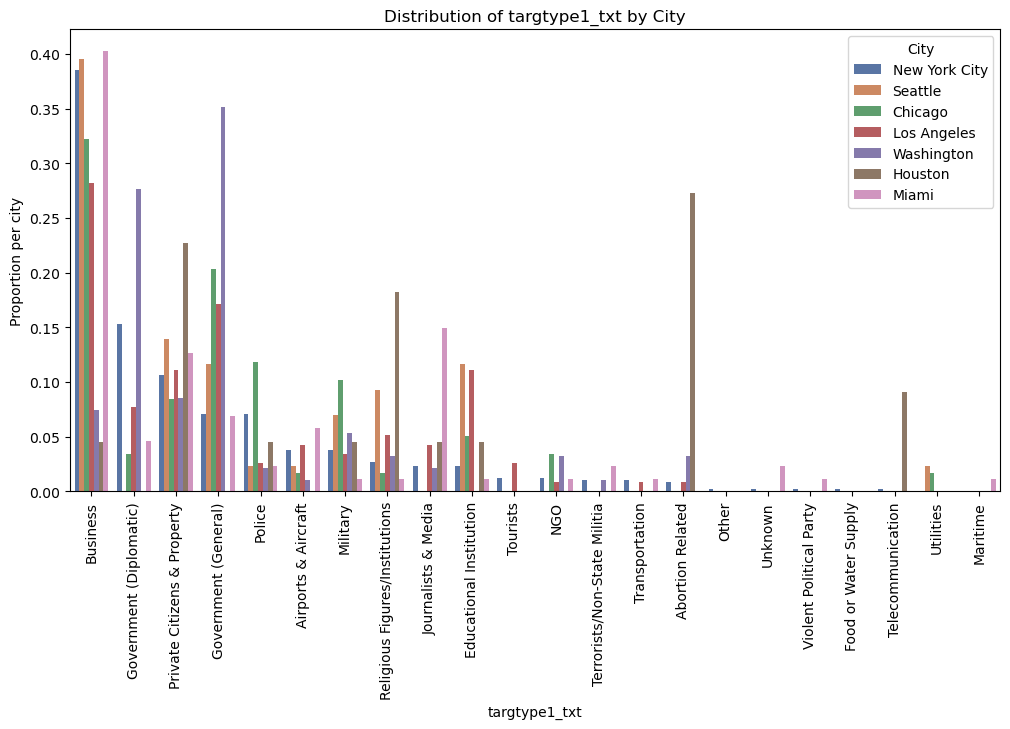

Observed Proportions of weaptype1_txt in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
Explosives,0.587866,0.604651,0.728814,0.692308,0.563830,0.318182,0.747126
Incendiary,0.207113,0.186047,0.152542,0.188034,0.127660,0.454545,0.114943
Firearms,0.121339,0.139535,0.101695,0.059829,0.148936,0.181818,0.103448
Melee,0.033473,0.000000,0.016949,0.000000,0.021277,0.045455,0.000000
Chemical,0.020921,0.023256,0.000000,0.017094,0.000000,0.000000,0.000000
Biological,0.014644,0.000000,0.000000,0.008547,0.085106,0.000000,0.000000
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",0.006276,0.000000,0.000000,0.017094,0.000000,0.000000,0.000000
Other,0.004184,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000
Unknown,0.002092,0.000000,0.000000,0.008547,0.031915,0.000000,0.034483
Radiological,0.002092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


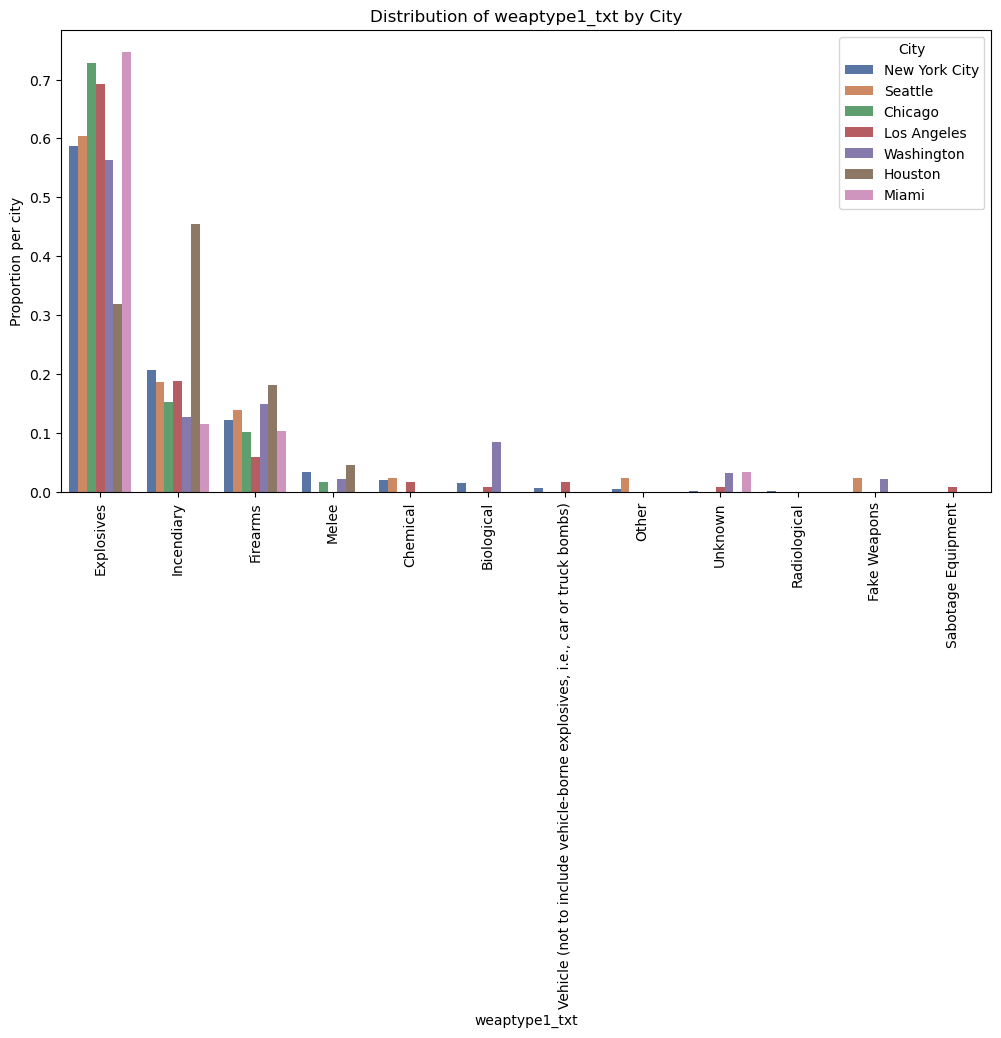

Observed Proportions of propextent in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
0.0,0.556485,0.325581,0.491525,0.410256,0.563830,0.363636,0.632184
3.0,0.347280,0.651163,0.322034,0.452991,0.265957,0.636364,0.229885
4.0,0.087866,0.000000,0.186441,0.128205,0.138298,0.000000,0.126437
2.0,0.004184,0.023256,0.000000,0.008547,0.031915,0.000000,0.011494
1.0,0.004184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


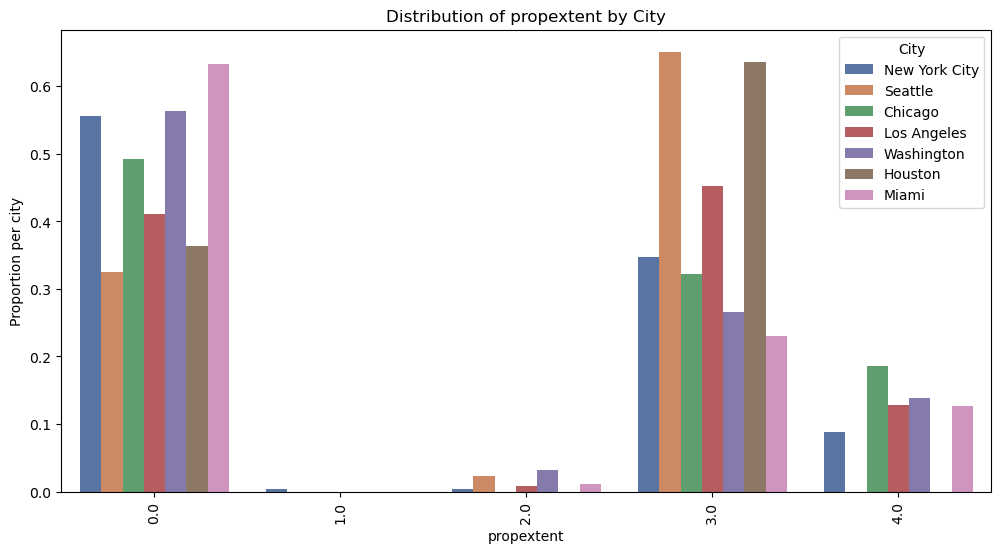

Observed Proportions of success in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
1,0.786611,0.813953,0.779661,0.854701,0.734043,0.863636,0.896552
0,0.213389,0.186047,0.220339,0.145299,0.265957,0.136364,0.103448


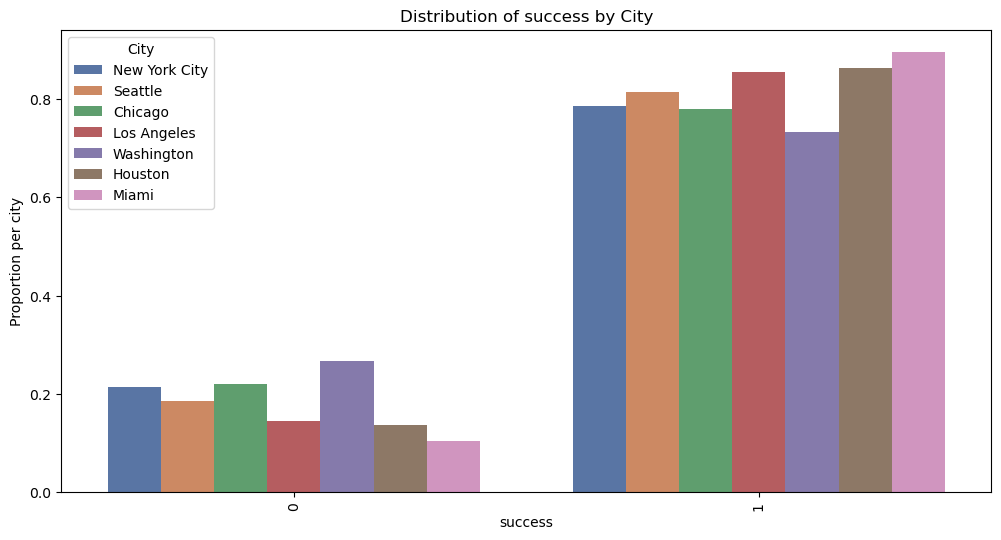

In [10]:
feats_of_int = ['attacktype1_txt','targtype1_txt','weaptype1_txt','propextent','success']
for x in feats_of_int :
    proportionhist(x)

### This is very interesting. I see many of the same patterns as before, but the side-by-side view of city proportions helps me understand the extent to which these patterns are present in each city. For instance, the proportion of bombing attacks in Washington is relatively low compared to other cities, even though bombing is the most common type of attack overall. 

### Moreover, the variation of proportion of target types draws a great deal of interest. Chicago displays relatively high proportions for a few target types, whereas Seattle attacks appear more evenly distributed. 

### Four of the seven cities record a majority of incidents that cause more than 1 million USD of property damage.

### Miami has the greatest proportion of successful attacks, and Washington has the least.

### I want to further understand the target types in each city, so I'll dive into the targsubtype1 variable. Ultimately, I'd like to introduce some more information such as city population, counts of certain institutions, etc. 

In [11]:
df.targsubtype1_txt.unique()

array(['School/University/Educational Building', 'Retail/Grocery/Bakery',
       'Military Recruiting Station/Academy',
       'Police Security Forces/Officers',
       'Police Patrol (including vehicles and convoys)',
       'Place of Worship',
       'Politician or Political Party Movement/Meeting/Rally',
       'Multinational Corporation', 'Bank/Commerce',
       'Military Barracks/Base/Headquarters/Checkpost',
       'Police Building (headquarters, station, school)',
       'Named Civilian', 'Government Building/Facility/Office',
       'Gas/Oil/Electric', 'Head of State',
       'Entertainment/Cultural/Stadium/Casino', 'Restaurant/Bar/Café',
       'Government Personnel (excluding police, military)',
       'Public Area (garden, parking lot, garage, beach, public building, camp)',
       'International NGO', 'Political Party Member/Rally', '0',
       'Diplomatic Personnel (outside of embassy, consulate)',
       'Domestic NGO', 'Radio', 'Terrorist', 'Construction',
       'Fire F

In [63]:
df.targsubtype1_txt.describe()

count                       900
unique                       78
top       Retail/Grocery/Bakery
freq                         98
Name: targsubtype1_txt, dtype: object

In [12]:
df.targsubtype1_txt.value_counts()

targsubtype1_txt
Retail/Grocery/Bakery                  98
Bank/Commerce                          91
Government Building/Facility/Office    53
0                                      52
Embassy/Consulate                      47
                                       ..
Fire Fighter/Truck                      1
Student                                 1
International NGO                       1
Affiliated Institution                  1
Election-related                        1
Name: count, Length: 78, dtype: int64

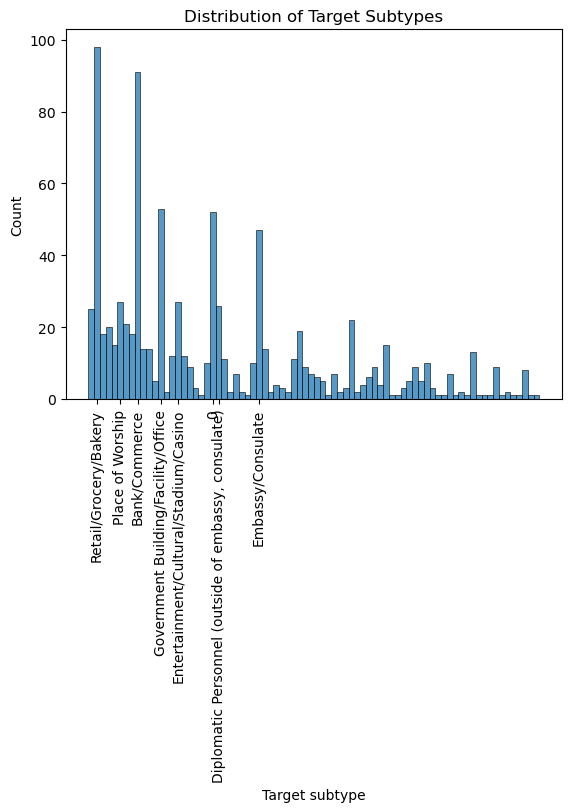

In [13]:
fig, ax = plt.subplots()
sns.histplot(x='targsubtype1_txt', data=df)
ax.set_title('Distribution of Target Subtypes')
ax.set_xlabel('Target subtype')
ax.tick_params(axis='x', rotation=90)
      
max_ticks = 8  
values = df['targsubtype1_txt'].value_counts().index[:max_ticks]  
ax.set_xticks(values)
ax.set_xticklabels(values) 
plt.show()

### It looks like the most common target subtypes over all are retail/grocery/bakery, place of worship, bank/commerce, government building, entertainment, diplomatic personnel, and embassy consulate. There is also a fair amount of unspecified subtypes. 

### To better understand the distribution of subtypes, I'll visualize the relative proportions of each subtype in each city. Since there are 78 unique categories, I'll set a threshold to visualize only those that occur more than 20 times.

In [54]:
def proportionhistlite(feature, threshold=20) :
    print(f"Observed Proportions of {feature} in each city for categories above {threshold} incidents")
    probdf = pd.DataFrame()
    citylist = [x for x in df.city.unique()]
    vc = df[feature].value_counts()
    var_of_int = vc[vc >= threshold].index.tolist()
    dflite = df[df[feature].isin(var_of_int)]
    for city in citylist:
        counts = dflite[dflite.city == city][feature].value_counts()
        ind = [i for i in counts.index]
        proportion = [x/counts.sum() for x in counts]
        myd = dict(zip(ind,proportion))
        newdf = pd.DataFrame.from_dict(myd,orient='index')
        newdf.rename(columns = {0:city}, inplace=True)
        probdf = pd.concat([probdf, newdf], axis=1)
    probdf.fillna(0, inplace=True)
    display(probdf)
    
    problite_long = probdf.reset_index().melt(id_vars='index', var_name='City', value_name='Proportion')
    
    # Create the histogram using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=problite_long, x='index', y='Proportion', hue='City', palette='deep')
    plt.xlabel(feature)
    plt.ylabel('Proportion per city')
    plt.title(f"Observed Proportions of {feature} in each city for categories above {threshold} incidents")
    plt.xticks(rotation=90)
    plt.legend(title='City')
    plt.show()

Observed Proportions of targsubtype1_txt in each city for categories above 20 incidents


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
Retail/Grocery/Bakery,0.240143,0.250000,0.151515,0.128571,0.075472,0.000000,0.159091
Bank/Commerce,0.225806,0.041667,0.272727,0.242857,0.000000,0.000000,0.022727
0,0.093190,0.166667,0.060606,0.057143,0.056604,0.000000,0.295455
Entertainment/Cultural/Stadium/Casino,0.071685,0.041667,0.000000,0.028571,0.000000,0.000000,0.090909
Embassy/Consulate,0.071685,0.000000,0.030303,0.071429,0.320755,0.000000,0.090909
Police Security Forces/Officers,0.050179,0.000000,0.060606,0.014286,0.018868,0.166667,0.022727
"Diplomatic Personnel (outside of embassy, consulate)",0.050179,0.000000,0.030303,0.057143,0.132075,0.000000,0.000000
Government Building/Facility/Office,0.046595,0.125000,0.181818,0.171429,0.283019,0.000000,0.090909
School/University/Educational Building,0.039427,0.125000,0.060606,0.100000,0.000000,0.166667,0.022727
Place of Worship,0.039427,0.166667,0.030303,0.085714,0.018868,0.500000,0.022727


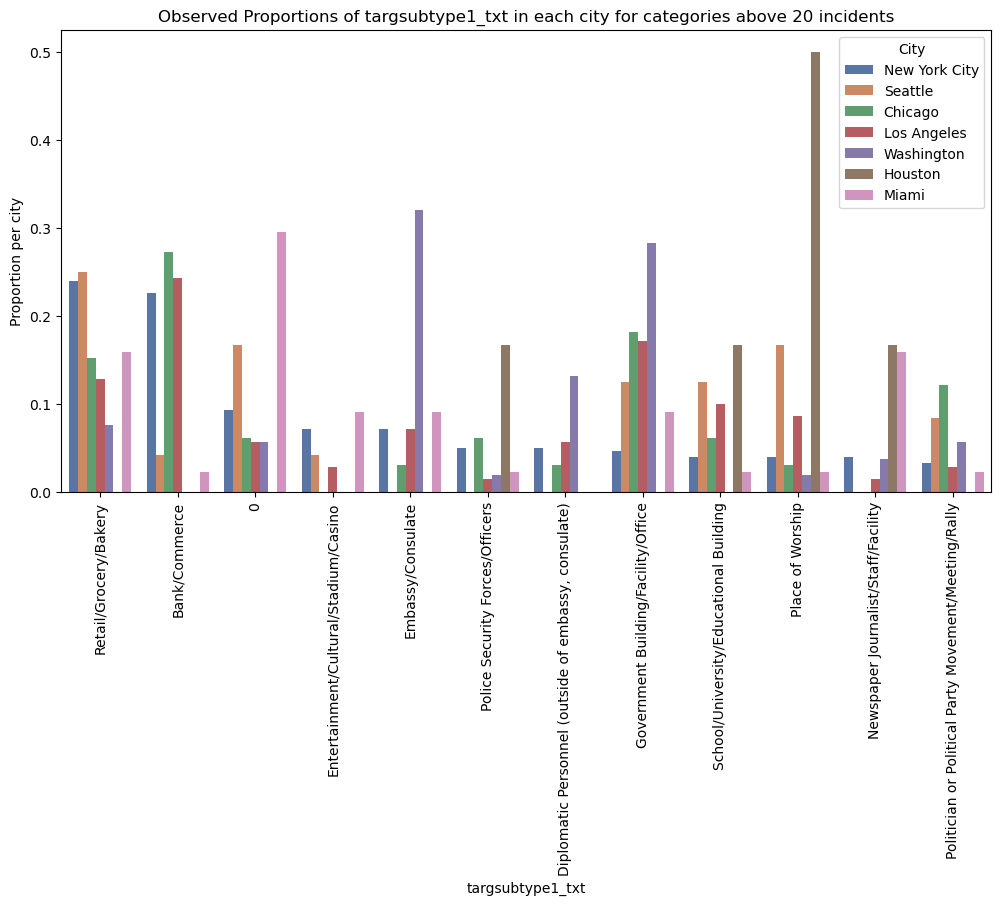

In [57]:
proportionhistlite('targsubtype1_txt',threshold = 20)

In [11]:
df.attacktype1_txt.unique()

array(['Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Assassination', 'Unarmed Assault', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unknown'], dtype=object)

Assume a null hypothesis that each attack is equally likely. Alternative Hypothesis: some attacks are more likely than others.

In [12]:
d = df[df.city == "Miami"].attacktype1_txt.value_counts()
d.index

Index(['Bombing/Explosion', 'Facility/Infrastructure Attack', 'Assassination',
       'Armed Assault', 'Unknown', 'Hijacking'],
      dtype='object', name='attacktype1_txt')

In [13]:
print("Observed Proportions of attack types in each city")
probdf = pd.DataFrame()
citylist = [x for x in df.city.unique()]
for city in citylist:
        counts = df[df.city == city].attacktype1_txt.value_counts()
        ind = [i for i in counts.index]
        proportion = [x/counts.sum() for x in counts]
        myd = dict(zip(ind,proportion))
        newdf = pd.DataFrame.from_dict(myd,orient='index')
        newdf.rename(columns = {0:city}, inplace=True)
        probdf = pd.concat([probdf, newdf], axis=1)
probdf.fillna(0, inplace=True)
probdf

Observed Proportions of attack types in each city


,New York City,Seattle,Chicago,Los Angeles,Washington,Houston,Miami
Bombing/Explosion,0.571130,0.604651,0.694915,0.692308,0.542553,0.318182,0.735632
Facility/Infrastructure Attack,0.194561,0.232558,0.152542,0.179487,0.138298,0.454545,0.114943
Armed Assault,0.104603,0.116279,0.067797,0.042735,0.138298,0.090909,0.022989
Unarmed Assault,0.048117,0.023256,0.000000,0.034188,0.085106,0.000000,0.000000
Assassination,0.043933,0.000000,0.033898,0.051282,0.042553,0.090909,0.091954
Hostage Taking (Barricade Incident),0.016736,0.000000,0.016949,0.000000,0.053191,0.000000,0.000000
Hijacking,0.012552,0.023256,0.000000,0.000000,0.000000,0.000000,0.011494
Hostage Taking (Kidnapping),0.006276,0.000000,0.033898,0.000000,0.000000,0.045455,0.000000
Unknown,0.002092,0.000000,0.000000,0.000000,0.000000,0.000000,0.022989


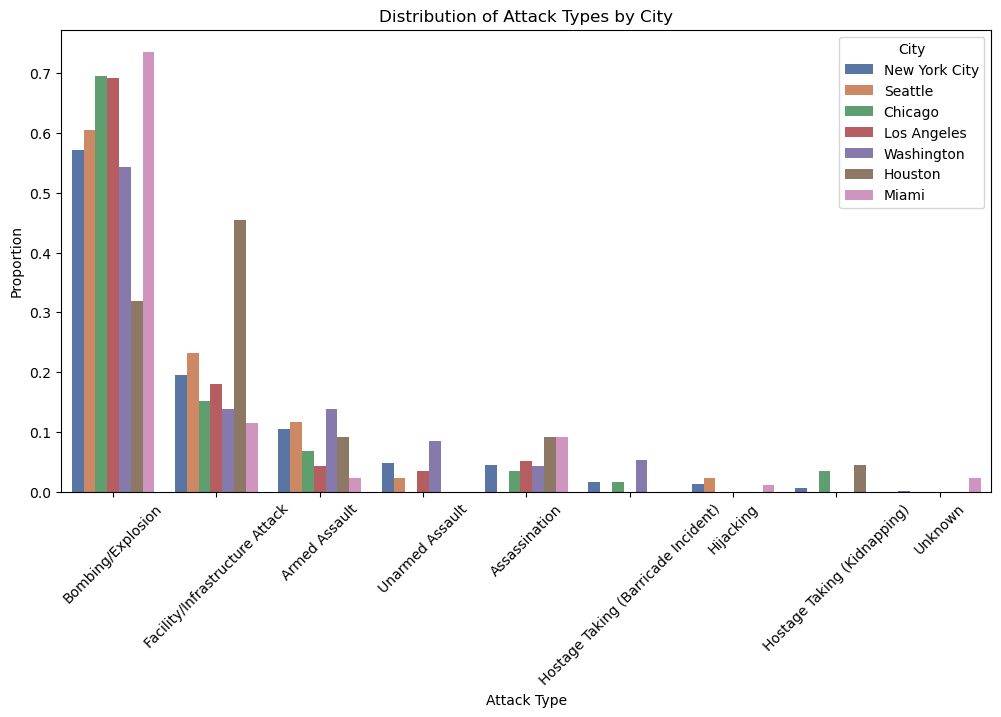

In [14]:
probdf_long = probdf.reset_index().melt(id_vars='index', var_name='City', value_name='Proportion')
# Create the histogram using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=probdf_long, x='index', y='Proportion', hue='City', palette='deep')
plt.xlabel('Attack Type')
plt.ylabel('Proportion')
plt.title('Distribution of Attack Types by City')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

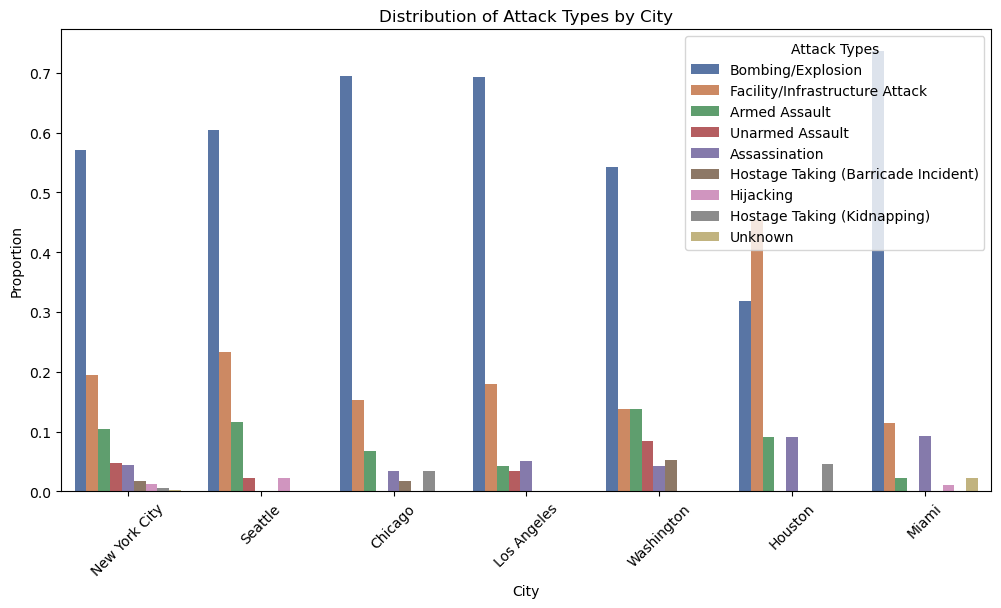

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=probdf_long, x='City', y='Proportion', hue='index', palette='deep')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.title('Distribution of Attack Types by City')
plt.xticks(rotation=45)
plt.legend(title='Attack Types')
plt.show()

These are observed proportions of each type of attack in each city. I want to test whether there is a significant deviation between these observations and the expected outcome if all attacks were equally likely. I will set alpha = 0.05.

The best test for this kind of categorical data is a chi squared goodness of fit test. 

In [16]:
chi_df = pd.DataFrame()
citylist = probdf.columns

results = {'City': [], 'Chi-Sq Stat': [], 'P-val': []}

for city in citylist:
    chi, p = chisquare(probdf[city])
    results['City'].append(city)
    results['Chi-Sq Stat'].append(chi)
    results['P-val'].append(p)

results_df = pd.DataFrame(results)

results_df

,City,Chi-Sq Stat,P-val
0,New York City,2.417403,0.965471
1,Seattle,2.908599,0.939962
2,Chicago,3.620224,0.889661
3,Los Angeles,3.654175,0.886900
4,Washington,2.100498,0.977775
5,Houston,1.938017,0.982853
6,Miami,4.076100,0.850193


Strangely, these p-values are extremely high. According to chi-square, there is no significant difference in the observed frequencies of attack types per city. Would I yield the same result for all observations across cities?

In [17]:
counts = df.attacktype1_txt.value_counts()
prop = [x/counts.sum() for x in counts]
chi, p = chisquare(prop)
print(chi, p)

2.6935111111111114 0.952096225206808


I find this odd. This is a question for mentorship!

What's the next step? Another interesting feature in the analysis across cities was target type. I'm curious 

In [18]:
from statsmodels.stats.proportion import proportions_ztest

citylist = probdf.columns

overall_mean_proportion = probdf.mean(axis=1)

results = {'City': [], 'Category': [], 'Z-score': [], 'P-val': []}

for city in citylist:
    for category in probdf.index:
        observed_proportion = probdf.loc[category, city]
        total_count = probdf.loc[category].sum()  # Total number of observations for the category
        count_successes = observed_proportion * total_count  # Number of occurrences of the category
        z_score, p_val = proportions_ztest(count_successes, total_count, overall_mean_proportion[category])
        results['City'].append(city)
        results['Category'].append(category)
        results['Z-score'].append(z_score)
        results['P-val'].append(p_val)

results_df = pd.DataFrame(results)

print(results_df)


             City                             Category   Z-score     P-val
0   New York City                    Bombing/Explosion -0.095051  0.924274
1   New York City       Facility/Infrastructure Attack -0.045898  0.963392
2   New York City                        Armed Assault  0.052994  0.957737
3   New York City                      Unarmed Assault  0.042600  0.966021
4   New York City                        Assassination -0.019506  0.984437
..            ...                                  ...       ...       ...
58          Miami                        Assassination  0.085116  0.932169
59          Miami  Hostage Taking (Barricade Incident)      -inf  0.000000
60          Miami                            Hijacking  0.009665  0.992289
61          Miami          Hostage Taking (Kidnapping)      -inf  0.000000
62          Miami                              Unknown  0.020506  0.983639

[63 rows x 4 columns]


C:\Users\casti\anaconda3\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std
